'''


    @Author: Shivraj Yelave
    @Date: 30-09-24
    @Last modified by: Shivraj Yelave
    @Last modified time: 
    @Title: Multiple Linear Regression Predict number of bikes


'''


###  importing libraries

In [1]:
import numpy as np
import pandas as pd
import statistics as st
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### importing data

In [2]:
# Correct path format for Windows
url = r"C:\Users\Admin\Documents\ML_programs\ML_Tasks\simple_linear_regression\bike_sharing.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [3]:
df = df.drop('dteday',axis=1)
df.shape

(17379, 16)

## Visualize outliers

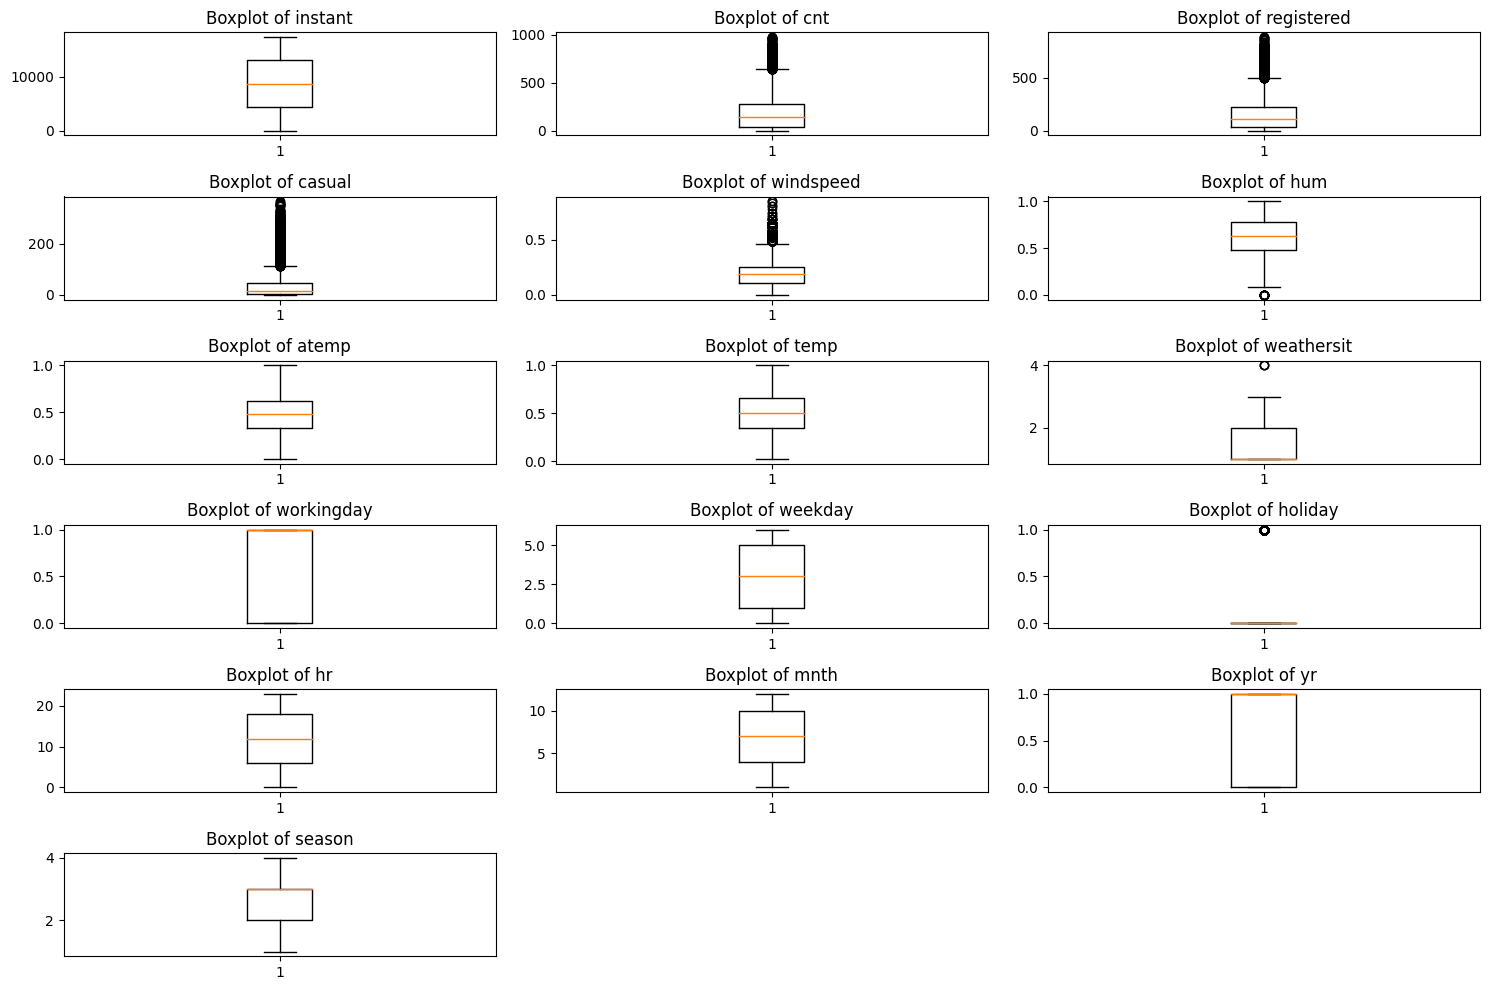

In [14]:

# Columns to plot boxplot for
columns_to_check = [
    'instant', 'cnt', 'registered', 'casual', 'windspeed', 
    'hum', 'atemp', 'temp', 'weathersit', 'workingday', 
    'weekday', 'holiday', 'hr', 'mnth', 'yr', 'season'
]

# Plot boxplots for the specified columns
n_columns = 3  # Number of columns in the subplot grid (adjust if needed)
n_rows = len(columns_to_check) // n_columns + (len(columns_to_check) % n_columns > 0)

# Create subplots
fig, axs = plt.subplots(n_rows, n_columns, figsize=(15, 10))  # Adjust figure size as needed
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Loop through the columns and create boxplots in the respective subplot
for i, column in enumerate(columns_to_check):
    axs[i].boxplot(df[column])  # Plot boxplot
    axs[i].set_title(f'Boxplot of {column}')  # Set title for each plot

# Hide any unused subplots (if the number of columns isn't a perfect fit)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()
plt.show()



### Apply log transformation to remove outliers

In [15]:

# Columns to apply log transformation
columns_to_check = [
    'cnt', 'registered', 'casual', 'windspeed', 
    'hum',  'weathersit',  'holiday'
]

# Apply log transformation to each column and store the result in cleaned_df
cleaned_df = df.copy()  # Make a copy of the original dataframe
cleaned_df[columns_to_check] = np.log1p(cleaned_df[columns_to_check])  # Apply log(1 + x) to avoid issues with zero values


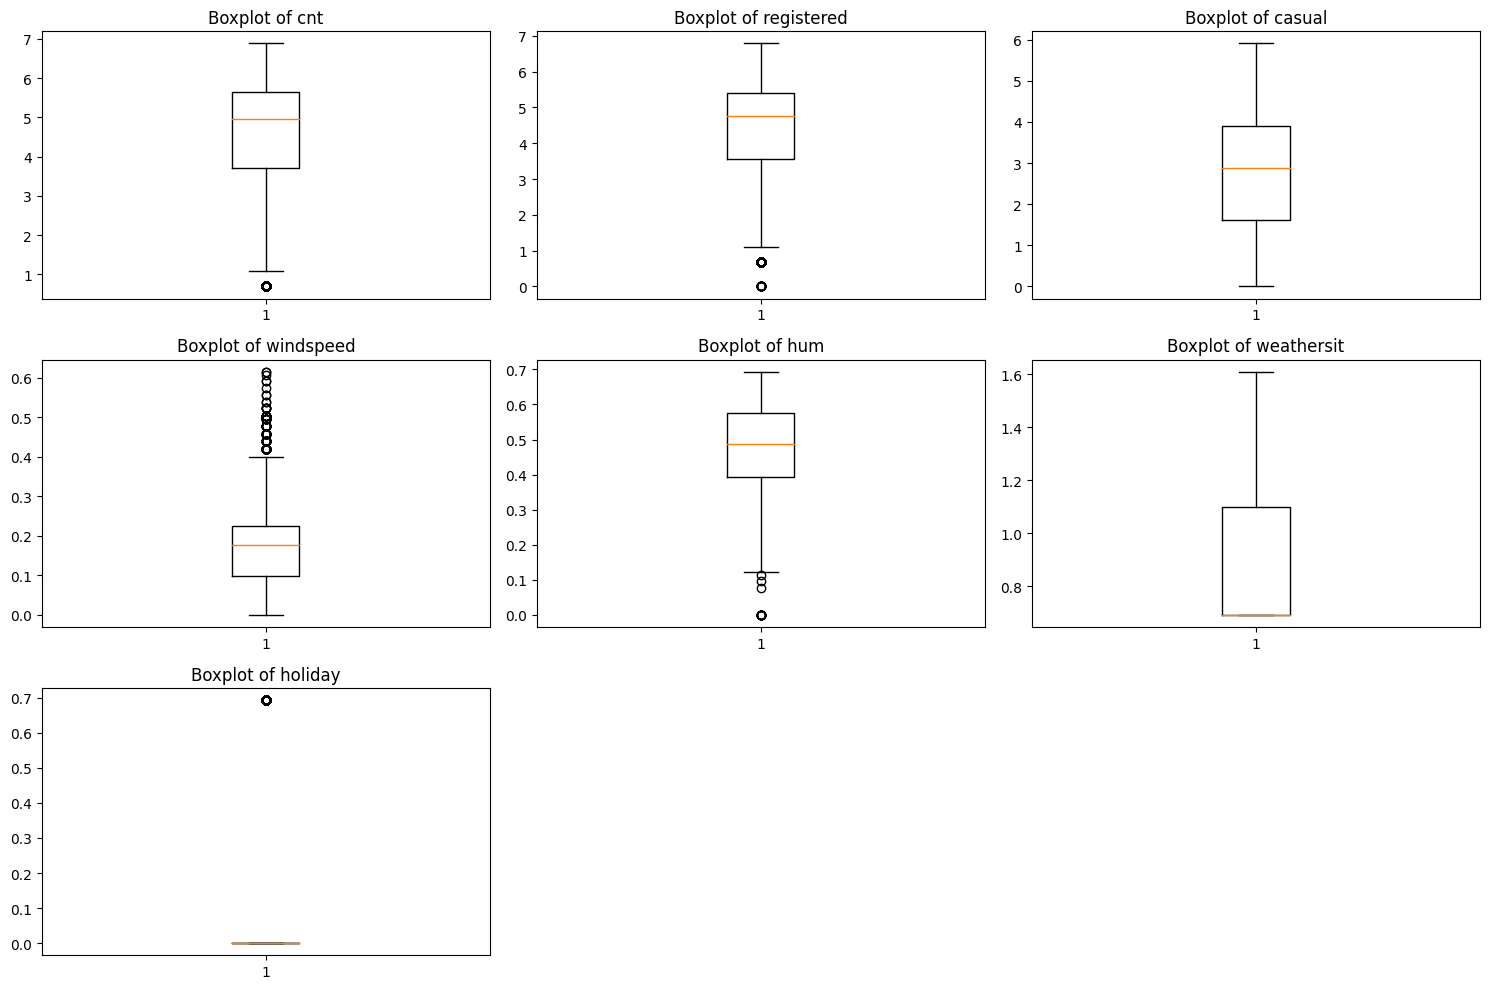

In [16]:

# Columns to plot histograms for
columns_to_check = [
    'cnt', 'registered', 'casual', 'windspeed', 
    'hum',  'weathersit',  'holiday'
]

# Plot boxplots for the specified columns
n_columns = 3  # Number of columns in the subplot grid (adjust if needed)
n_rows = len(columns_to_check) // n_columns + (len(columns_to_check) % n_columns > 0)

# Create subplots
fig, axs = plt.subplots(n_rows, n_columns, figsize=(15, 10))  # Adjust figure size as needed
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Loop through the columns and create boxplots in the respective subplot
for i, column in enumerate(columns_to_check):
    axs[i].boxplot(cleaned_df[column])  # Plot boxplot
    axs[i].set_title(f'Boxplot of {column}')  # Set title for each plot

# Hide any unused subplots (if the number of columns isn't a perfect fit)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()
plt.show()



In [17]:
cleaned_df.isna().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Scaling Dataset

In [18]:
scalar = StandardScaler()

# Fit and transform the data
scaled_array = scalar.fit_transform(cleaned_df)

# Create a new DataFrame with the scaled data and original column names
scaled_df = pd.DataFrame(scaled_array, columns=cleaned_df.columns)

# Display the scaled DataFrame
print(scaled_df.head())

    instant    season        yr      mnth        hr   holiday   weekday  \
0 -1.731951 -1.356634 -1.005134 -1.610438 -1.670004 -0.172112  1.493891   
1 -1.731752 -1.356634 -1.005134 -1.610438 -1.525374 -0.172112  1.493891   
2 -1.731552 -1.356634 -1.005134 -1.610438 -1.380744 -0.172112  1.493891   
3 -1.731353 -1.356634 -1.005134 -1.610438 -1.236115 -0.172112  1.493891   
4 -1.731154 -1.356634 -1.005134 -1.610438 -1.091485 -0.172112  1.493891   

   workingday  weathersit      temp     atemp       hum  windspeed    casual  \
0     -1.4669    -0.68865 -1.334648 -1.093281  0.939950  -1.669058 -0.886125   
1     -1.4669    -0.68865 -1.438516 -1.181732  0.894131  -1.669058 -0.341875   
2     -1.4669    -0.68865 -1.438516 -1.181732  0.894131  -1.669058 -0.614000   
3     -1.4669    -0.68865 -1.334648 -1.093281  0.661151  -1.669058 -0.886125   
4     -1.4669    -0.68865 -1.334648 -1.093281  0.661151  -1.669058 -1.816526   

   registered       cnt  
0   -1.243723 -1.228305  
1   -0.630465 -0

In [23]:
scaled_df.shape

(17379, 16)

### Spliting dataset

In [19]:
y = scaled_df[['cnt']]
X = scaled_df.drop('cnt',axis=1)
print(X.head())
print(y.head())

    instant    season        yr      mnth        hr   holiday   weekday  \
0 -1.731951 -1.356634 -1.005134 -1.610438 -1.670004 -0.172112  1.493891   
1 -1.731752 -1.356634 -1.005134 -1.610438 -1.525374 -0.172112  1.493891   
2 -1.731552 -1.356634 -1.005134 -1.610438 -1.380744 -0.172112  1.493891   
3 -1.731353 -1.356634 -1.005134 -1.610438 -1.236115 -0.172112  1.493891   
4 -1.731154 -1.356634 -1.005134 -1.610438 -1.091485 -0.172112  1.493891   

   workingday  weathersit      temp     atemp       hum  windspeed    casual  \
0     -1.4669    -0.68865 -1.334648 -1.093281  0.939950  -1.669058 -0.886125   
1     -1.4669    -0.68865 -1.438516 -1.181732  0.894131  -1.669058 -0.341875   
2     -1.4669    -0.68865 -1.438516 -1.181732  0.894131  -1.669058 -0.614000   
3     -1.4669    -0.68865 -1.334648 -1.093281  0.661151  -1.669058 -0.886125   
4     -1.4669    -0.68865 -1.334648 -1.093281  0.661151  -1.669058 -1.816526   

   registered  
0   -1.243723  
1   -0.630465  
2   -0.747977  
3   

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

### Model Selection

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [22]:

# Evaluate the model
mse = mean_squared_error(y_test, y_predict)  # Mean Squared Error
r2 = r2_score(y_test, y_predict)  # R-squared value

# Output the results
print(f"Mean Squared Error: {mse:.10f}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0034027769
R-squared: 0.9965256439346258


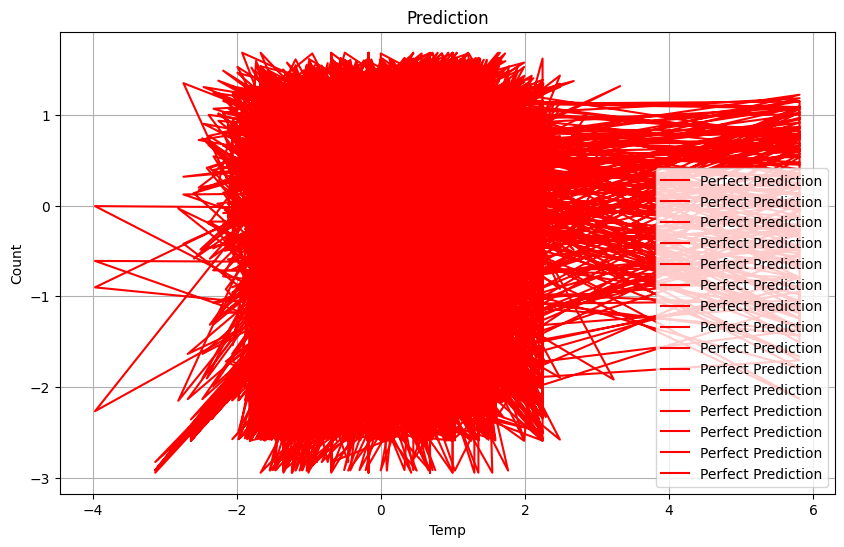

In [25]:

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
# plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')

# Plot the line of best fit
plt.plot(X_test,y_predict, color='red',label='Perfect Prediction')

# Add labels and title
plt.title('Prediction')
plt.xlabel('Temp')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()
